# The Computational Notebook Paradigm for Multi-Paradigm Modeling

**Bentley James Oakes**, Romain Franceschini, Simon Van Mierlo, Hans Vangheluwe



## Introduction

* Motivation: Reproducibility in Science
* Computational Notebook (CN) Example
* CN Paradigm
* CN Paradigm for Multi-Paradigm Modeling

## Reproducibility

> guarantees that a particular phenomenon can be (re-)observed in a well-defined context

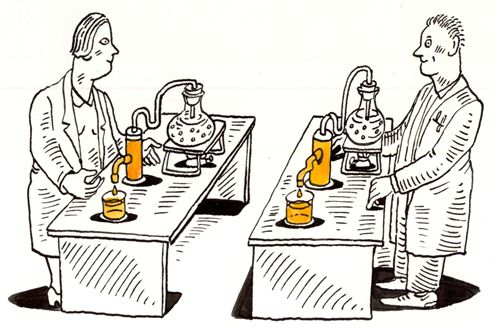


Reproducible Research in Data Science
https://github.com/mdozmorov/presentations/


**Repeatability** = *same* team and *same* methods -> *same* results (with some measure of precision).

**Replicability** = *different* team and *same* methods -> *same* results.

**Reproducibility** = *different* team and *different* methods -> *same* results.


S. Schnell, ““Reproducible” Research in Mathematical Sciences Requires Changes in our Peer Review Culture and Modernization of our Current Publication Approach,” Bulletin of Mathematical Biology, vol. 80, no. 12, pp. 3095–3105, Sep. 2018.

For experimental reproduction, need to disseminate:

* Scientific notes, such as:
  * Experimental conditions, data
  * Processes, observations, and insights

* In computational domain, further barriers:
  * Hardware and software versioning
  * Program state
    * Ex. seed for random number generation

* Multi-paradigm modeling can assist by providing explicit, standardized syntax and semantics.
  * Example: Petri nets

How can computational notebooks assist?

## Computational Notebooks

* Similar to the *read-evaluate-print-loop* (REPL) of a shell
* Execute code, examine the result

* But notebooks add:
  * Record of code execution
  * Documentation (text, images, video, website embeds, etc.)

Code Example:

In [1]:
import datetime
x = datetime.datetime.now()
print("Hello MPM4CPS! The time is: " + str(x))

Hello MPM4CPS! The time is: 2019-09-02 16:37:15.536742


* Computational notebooks gather documentation, workflows, and data
* Notebook entries are *Input cells* and *Output cells*
  * Cells are executed with a particular *Kernel*
  * Example: Python code is executed with the IPython kernel
* Input cells can be repeatedly modified and re-executed

### Bouncing Ball Example

A small example of a bouncing ball model follows, implemented as a black-box in the Functional Mock-up Interface (FMI) standard.

Objective: Show *experimentation* and *documentation* processes possible within the CNP.

The equations and initial conditions:

In [2]:
%%latex
\begin{equation}
\frac{dh}{dt} = v; \frac{dv}{dt} = -g;\\
\mathit{when}~h < 0~\mathit{then}~v := -e * v;\\
\mathit{initial:}~e = 0.7, g = 9.81
\end{equation}

<IPython.core.display.Latex object>

In [3]:
from pyfmi import load_fmu
model = load_fmu('bouncingBall.fmu')

In [4]:
import pylab as P

def plot(res):
    fig = P.figure(figsize=(3, 1.75),)
    P.clf()
    P.plot(res['time'], res['h'])
    P.ylabel('Height (m)')
    P.xlabel('Time (s)')
    P.suptitle('FMI Bouncing Ball')
    P.show()

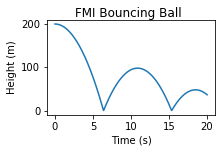

In [5]:
model.reset()
model.set('h',200)
result = model.simulate(final_time = 20.)
plot(result)

Can experiment with h as 100, 300, 0.01, 0, and observe results

## Computational Notebook Paradigm

* Examine *Entities* and *Processes*
* Describe compatibility points between the CNP and MPM

### Notebook Entities

Let's divide entities into three sections:

* Input and Output cells
* Languages and Kernels
* Users and Processes

### Notebook Entities - Cells

The notebook is a linear presentation of cells.

<img src="centre.png" width="300" height="200" />

### Notebook Entities - Languages

<img src="right.png" width="600" height="400" />


* Languages/Kernels/Visualizer entities represent different formalisms
    * Multiple kernels available: NodeJS, Scheme, PHP, Bash, etc.
    * A notebook can have multiple kernels available

### Notebook Entities - Users

<img src="left.png" width="600" height="400" />

Users interact with notebooks in various processes, and produce artefacts (such as PDFs or LaTeX)

### Process - Experimentation

* Umbrella term: Optimization, verification, simulation, 
* Objective is exploring the system under study
   * Allow same/different team to understand system behaviour

* Integrating MPM allows for *full-system evaluation*
    * Capture properties of interest, design, property-checking processes together
    * Example: If the ball height is less than 1km, will it take less than 5 minutes to settle on the ground?

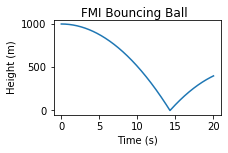

In [6]:
model.reset()
model.set('h',1000)
result = model.simulate(final_time = 20.)
plot(result)

### Process - Documentation
  * Notebooks retain code and results for future
  * Can produce artefacts (PDF, LaTeX, online notebook)
      * Section in paper produced from notebook LaTeX

Can go farther with capturing 
  * Binder (mybinder.org) hosts online notebooks
    * Hosts a container with software dependencies
    * Bouncing ball notebook and this presentation available at:
        * FILL IN

## Computational Notebook Paradigm (CNP) for Multi-Paradigm Modeling (MPM)

High degree of compatibility between the CNP and MPM.

Next slides will discuss three areas where CNP could better support MPM:
* Model Frames
* Domain-Specific Languages (DSLs)
* History and Traceability




### Model Frames

Has three components:

a. a *modeling activity* such as calibration or verification, with inputs, outputs, and a
process description

b. a *context* with objectives, assumptions, and constraints, and

c. zero or more *sub-frames*.

Example for the bouncing ball model: 
* Modeling activity: Simulation validity
* Context: Only valid with height above 1m and temperature -65 °C to 180 °C
  * Silicon balls: https://www.rgpballs.com/en/manufacturing/silicone-rubber-balls/

#### Model Frame Example

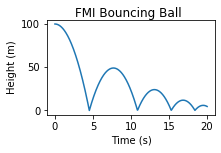

In [7]:
# check if parameters above 1m height, between -65 and 180 C
def bb_frame(height, temp, t, fcn):
    if height < 0:
        raise Exception("Invalid height!")
    if temp < -65 or temp > 180:
        raise Exception("Invalid temperature!")
        
    model.reset()
    model.set('h',height)
    return fcn(final_time = t)
       
result = bb_frame(height=100, temp=25, t=20, fcn=model.simulate)
plot(result)

Further steps: Precise simulator initialization, temporal logic checking, configuration frames

### Domain-Specific Languages

User may want to create languages during the computational notebook activity

BouncingBallLang Example:

In [8]:
#BouncingBallLang syntax
#[BALL_ID HEIGHT]

In [9]:
#BouncingBallLang semantics
def bb_execute(statement):
    ball_id = statement[0]
    h = statement[1]
    temp = 25
    print("Result for bouncing ball '" + ball_id +"':")
    plot(bb_frame(h, temp=temp, t=20, fcn=model.simulate))

Result for bouncing ball 'BALL1':


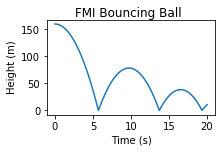

In [10]:
#BouncingBallLang Usage
ball = ["BALL1", 160]
bb_execute(ball)

### History and Traceability

* As just shown, history of cells is not retained. 
* Also, there is no mechanism for representing relationships between cells
  * Such as *conformance* between the bouncing ball language and its usage

## Conclusion and Future Work

* Demonstrated the computational notebook paradigm (CNP) and benefits:
  * Enhance reproducibility
  * Communicate results and understandings
* Discussed interactions between CNP and multi-paradigm modelling (MPM)
  * Natural integration of CNP kernels and MPM techniques
  * Highlighted areas of improvement
  
##### Future Work
* Implement MPM-based kernels, such as connection to the ModelVerse
* Examine model frames and their integration

This presentation available as an online Jupyter notebook:
https://mybinder.org/v2/git/http%3A%2F%2Fmsdl.uantwerpen.be%2Fgit%2Fbentley%2FNotebookParadigmPaper2019-presentation.git/master

Short link: http://bit.do/e6yL8